In [5]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/96/cf/a714a655266229b51eb2bda117f15275f12457887f165f3c1cc58ab502f1/scikit_learn-1.3.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 660.6 kB/s eta 0:00:14
   ---------------------------------------- 0.0/9.2 MB 393.8 kB/s eta 0:00:24
   ---------------------------------------- 0.1/9.2 MB 469.7 kB/s eta 0:00:20
   ---------------------------------------- 0.1/9.2 MB 65

*Студент: Трифонов Сергей*

# Задание 1.
Сгенерировать случайным образом 3 набора данных (см. картинки).
Количество точек в каждом от 100 до 200. Цветом обозначены метки классов.
Для каждого набора данных:
* Разделить датасет на train / test (80/20)
* Обучить и протестировать KNN
* Построить графики точности классификации (на train/test выборках) при разных k (1...8)
* Пользуясь стандартными методами из scikit-learn вычислить точность, полноту и F1-меру, построить матрицу расхождений

## 1 набор данных

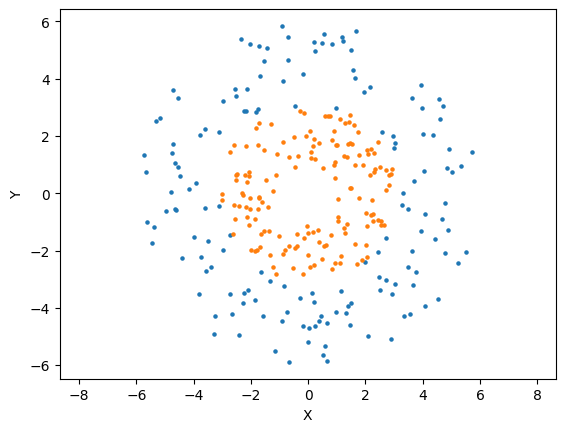

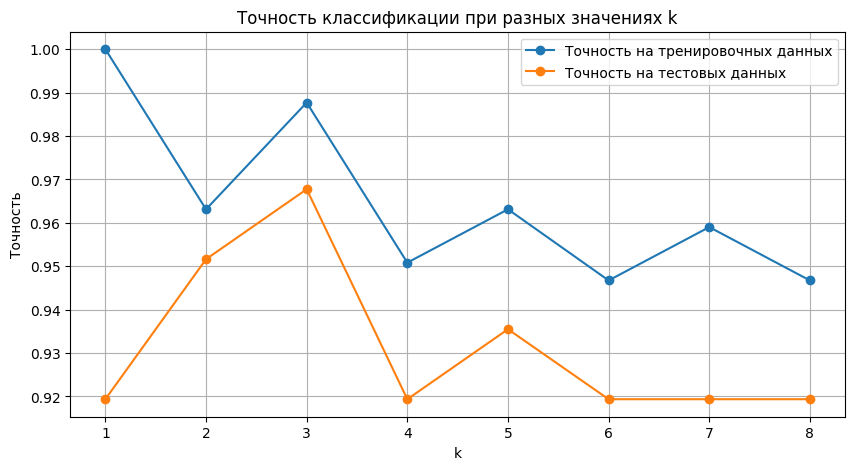

Лучшее значение k: 3
Точность: 0.97
Полнота: 0.97
F1-мера: 0.97


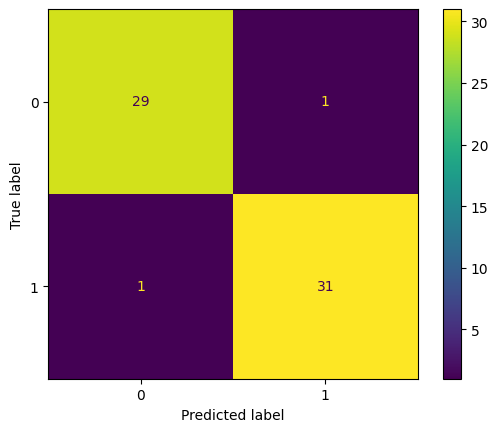

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

num_points = np.random.randint(100, 200)
# Задаем параметры внешнего кольца
center1 = [0, 0]  
inner_radius1 = 3 
outer_radius1 = 6  

# Генерируем случайные точки внутри первого кольца
theta1 = np.random.uniform(0, 2*np.pi, num_points)
r1 = np.sqrt(np.random.uniform(inner_radius1**2, outer_radius1**2, num_points))
x1 = center1[0] + r1*np.cos(theta1)
y1 = center1[1] + r1*np.sin(theta1)

# Задаем параметры внутреннего кольца
center2 = [0, 0] 
inner_radius2 = 1 
outer_radius2 = 3.1

# Генерируем случайные точки внутри внутреннего кольца
theta2 = np.random.uniform(0, 2*np.pi, num_points)
r2 = np.sqrt(np.random.uniform(inner_radius2**2, outer_radius2**2, num_points))
x2 = center2[0] + r2*np.cos(theta2)
y2 = center2[1] + r2*np.sin(theta2)

# Создаем метки классов для внешнего и внутреннего кольца
labels1 = np.ones(len(x1))  # 1 для внешнего кольца
labels2 = np.zeros(len(x2))  # 0 для внутреннего кольца

# Объединяем данные и метки классов
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
y = np.hstack((labels1, labels2))

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем список для хранения точности на тренировочных и тестовых данных при разных значениях k
train_accuracy = []
test_accuracy = []

# Перебираем разные значения k (1...8) и обучаем модель KNN для каждого значения
for k in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) #обучаем
    
    # Предсказываем классы на тренировочных и тестовых данных
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Вычисляем точность на тренировочных и тестовых данных и добавляем в списки
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Визуализация данных
plt.scatter(x1, y1, s=5, label='Внешнее кольцо')
plt.scatter(x2, y2, s=5, label='Внутреннее кольцо')
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()    
    
# Строим графики точности классификации
plt.figure(figsize=(10, 5))
plt.plot(range(1, 9), train_accuracy, marker='o', label='Точность на тренировочных данных')
plt.plot(range(1, 9), test_accuracy, marker='o', label='Точность на тестовых данных')
plt.xlabel('k')
plt.ylabel('Точность')
plt.title('Точность классификации при разных значениях k')
plt.legend()
plt.grid(True)
plt.show()

# Вычисляем точность, полноту и F1-меру
best_k = test_accuracy.index(max(test_accuracy)) + 1
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_test_pred = best_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Лучшее значение k: {best_k}")
print(f"Точность: {accuracy:.2f}")
print(f"Полнота: {recall:.2f}")
print(f"F1-мера: {f1:.2f}")

# Строим матрицу расхождений
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

## 2 набор данных

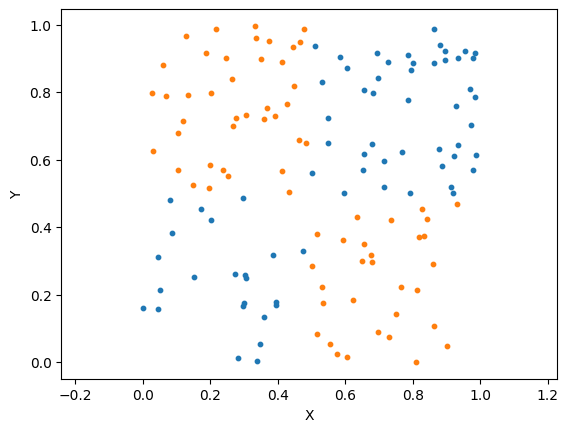

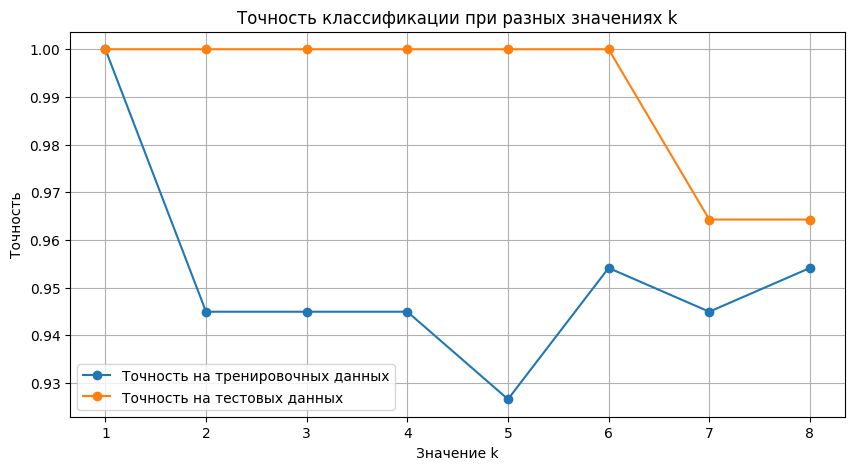

Лучшее значение k: 1
Точность: 1.00
Полнота: 1.00
F1-мера: 1.00


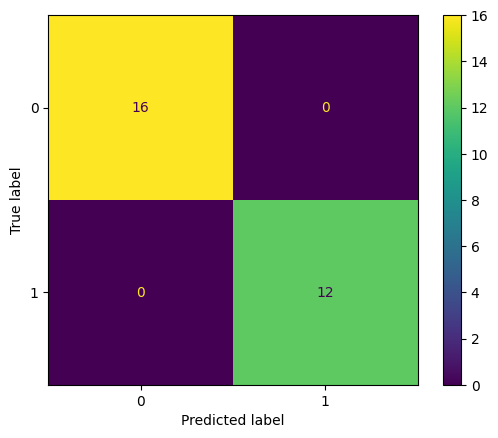

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

num_points = np.random.randint(100, 200)
x_min, x_max = 0.0, 1.0
y_min, y_max = 0.0, 1.0
x_class1 = []
y_class1 = []
x_class2 = []
y_class2 = []

for _ in range(num_points):
    x = np.random.uniform(x_min, x_max)
    y = np.random.uniform(y_min, y_max)
    if (x < 0.5 and y < 0.5) or (x >= 0.5 and y >= 0.5):
        x_class1.append(x)
        y_class1.append(y)
    else:
        x_class2.append(x)
        y_class2.append(y)
        
labels1 = np.zeros(len(x_class1))
labels2 = np.ones(len(x_class2))

x = np.vstack((np.column_stack((x_class1, y_class1)), np.column_stack((x_class2, y_class2))))
y = np.hstack((labels1, labels2))

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.2)

train_accuracy = []
test_accuracy = []

for k in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_training_data, y_training_data) 
    
    y_train_pred = knn.predict(x_training_data)
    y_test_pred = knn.predict(x_test_data)
    
    train_accuracy.append(accuracy_score(y_training_data, y_train_pred))
    test_accuracy.append(accuracy_score(y_test_data, y_test_pred))

# Визуализируем данные
plt.scatter(x_class1, y_class1, s=10, label='Первый датасет')  
plt.scatter(x_class2, y_class2, s=10, label='Второй датасет')  
plt.axis('equal')  
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Строим графики точности классификации
plt.figure(figsize=(10, 5))
plt.plot(range(1, 9), train_accuracy, marker='o', label='Точность на тренировочных данных')
plt.plot(range(1, 9), test_accuracy, marker='o', label='Точность на тестовых данных')
plt.xlabel('Значение k')
plt.ylabel('Точность')
plt.title('Точность классификации при разных значениях k')
plt.legend()
plt.grid(True)
plt.show()

# Вычисляем точность, полноту и F1-меру
best_k = test_accuracy.index(max(test_accuracy)) + 1
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_training_data, y_training_data)
y_test_pred = best_knn.predict(x_test_data)

accuracy = accuracy_score(y_test_data, y_test_pred)
precision = precision_score(y_test_data, y_test_pred)
recall = recall_score(y_test_data, y_test_pred)
f1 = f1_score(y_test_data, y_test_pred)

print(f"Лучшее значение k: {best_k}")
print(f"Точность: {accuracy:.2f}")
print(f"Полнота: {recall:.2f}")
print(f"F1-мера: {f1:.2f}")

# Строим матрицу расхождений
conf_matrix = confusion_matrix(y_test_data, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

## 3 набор данных

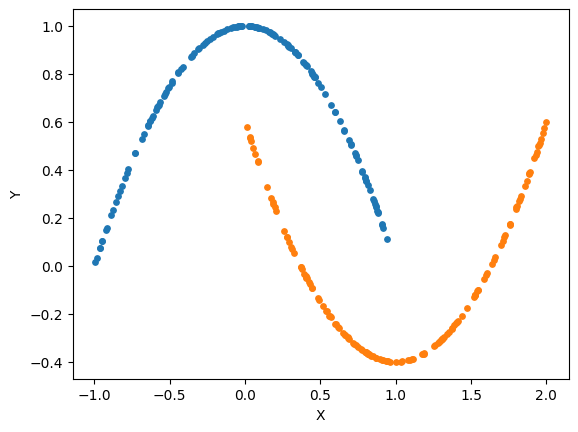

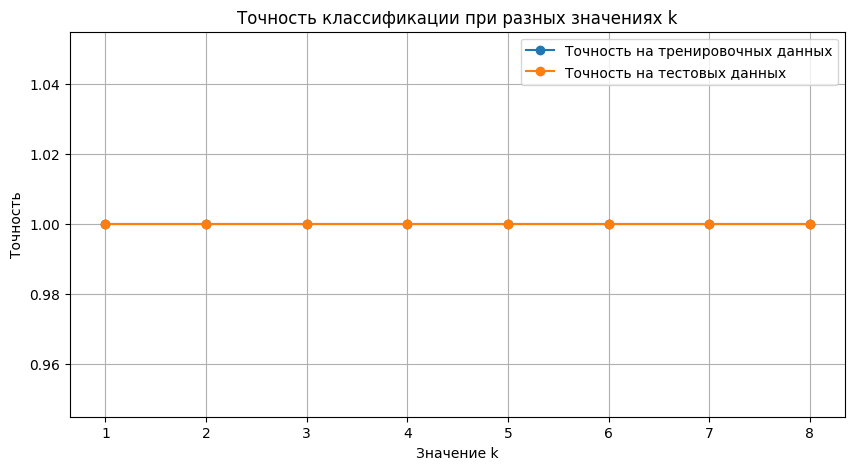

Лучшее значение k: 1
Точность: 1.00
Полнота: 1.00
F1-мера: 1.00


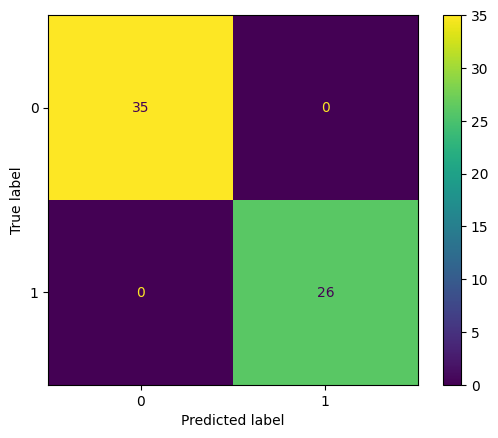

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


num_points = np.random.randint(100, 200)
# Генерируем случайные точки для положительной параболы
x1 = np.random.uniform(-1, 1, num_points)
y1 = -x1**2 +1

# Генерируем случайные точки для отрицательной параболы
x2 = np.random.uniform(0, 2, num_points)
y2 = (x2-1)**2 - 0.4

# Создаем метки классов для внешнего и внутреннего кольца
labels1 = np.ones(len(x1))  # 1 для внешнего кольца
labels2 = np.zeros(len(x2))  # 0 для внутреннего кольца

# Объединяем данные и метки классов
x = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
y = np.hstack((labels1, labels2))

# Разделим данные на train/test наборы
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.2, random_state=23) 

# Создаем список для хранения точности на тренировочных и тестовых данных при разных значениях k
training_accuracy = []
test_accuracy = []

# Перебираем разные значения k (1...8) и обучаем модель KNN для каждого значения
for k in range(1, 9):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_training_data,y_training_data)
    
    # Предсказываем классы на тренировочных и тестовых данных
    y_predict_test_data = model.predict(x_test_data)
    y_predict_training_data = model.predict(x_training_data)
    
    # Вычисляем точность на тренировочных и тестовых данных и добавляем в списки
    training_accuracy.append(accuracy_score(y_training_data, y_predict_training_data))
    test_accuracy.append(accuracy_score(y_test_data, y_predict_test_data))
    
    
    
# Визуализируем данные
plt.scatter(x1, y1, s=15, label='Положительная парабола')
plt.scatter(x2, y2, s=15, label='Отрицательная парабола')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Строим графики точности классификации
plt.figure(figsize=(10, 5))
plt.plot(range(1, 9), training_accuracy, marker='o', label='Точность на тренировочных данных')
plt.plot(range(1, 9), test_accuracy, marker='o', label='Точность на тестовых данных')
plt.xlabel('Значение k')
plt.ylabel('Точность')
plt.title('Точность классификации при разных значениях k')
plt.legend()
plt.grid(True)
plt.show()

# Вычисляем точность, полноту и F1-меру
best_k = test_accuracy.index(max(test_accuracy)) + 1
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_training_data, y_training_data)
y_predict_test_data = best_knn.predict(x_test_data)

accuracy = accuracy_score(y_test_data, y_predict_test_data)
precision = precision_score(y_test_data, y_predict_test_data)
recall = recall_score(y_test_data, y_predict_test_data)
f1 = f1_score(y_test_data, y_predict_test_data)

print(f"Лучшее значение k: {best_k}")
print(f"Точность: {accuracy:.2f}")
print(f"Полнота: {recall:.2f}")
print(f"F1-мера: {f1:.2f}")

# Строим матрицу расхождений
conf_matrix = confusion_matrix(y_test_data, y_predict_test_data)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Задание 2. Метрики
Даны 
</p>25 объектов классифицированы на 3 класса</p>
</p>C="Cat"</p>
</p>F="Fish"</p>
</p>H="Hen"</p>
</p>//истинные значения</p>
</p>y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]</p>
</p>//результат системы</p>
</p>y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]</p>
Написать код на python, который воспроизводит вывод, представленный ниже (не 
используя сторонние библиотеки, кроме numpy):

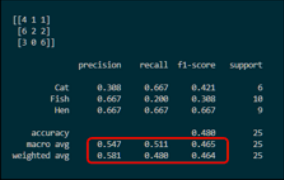

In [58]:
import numpy as np

C="Cat"
F="Fish"
H="Hen"
# истинные значения
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
# результат системы
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

target_names = ['Cat','Fish','Hen']

from sklearn import metrics
# Print the confusion matrix
print(metrics.confusion_matrix(y_true, y_pred))
# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))


# Ручная функция для подсчета матрицы расхождений
def custom_confusion_matrix(y_true, y_pred, labels):
    num_classes = len(labels)
    matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true, pred in zip(y_true, y_pred):
        true_idx = labels.index(true)
        pred_idx = labels.index(pred)
        matrix[true_idx][pred_idx] += 1

    return matrix

# Ручная функция для создания отчета о классификации
def custom_classification_report(y_true, y_pred, labels):
    matrix = custom_confusion_matrix(y_true, y_pred, labels)

    num_classes = len(labels)
    report = "              precision    recall  f1-score   support\n\n"

    sum_f1 = 0
    weighted_f1_score = 0
    weighted_precision = 0
    weighted_recall = 0
    
    for i in range(num_classes):
        precision = matrix[i][i] / sum(matrix[:, i]) if sum(matrix[:, i]) > 0 else 0
        recall = matrix[i][i] / sum(matrix[i, :]) if sum(matrix[i, :]) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        support = sum(matrix[i, :])

        report += f"{labels[i]:>11}   {precision:9.3f}   {recall:7.3f}   {f1_score:8.3f}   {support:6}\n"
        sum_f1 = f1_score + sum_f1
        weighted_precision = (precision * support / len(y_true)) + weighted_precision
        weighted_recall = (recall * support / len(y_true)) + weighted_recall
        weighted_f1_score = (f1_score * support / len(y_true)) + weighted_f1_score
        
        

        
    accuracy = sum(matrix[i][i] for i in range(num_classes)) / len(y_true)
    
    macro_precision = sum(matrix[i][i] / sum(matrix[:, i]) for i in range(num_classes)) / num_classes
    macro_recall = sum(matrix[i][i] / sum(matrix[i, :]) for i in range(num_classes)) / num_classes
    macro_f1_score = sum_f1 / num_classes

    report += f"\n{'accuracy':>11} {' ' * 8}   {' ' * 8}  {' '} {accuracy:9.3f}     {len(y_true):4}\n"
    report += f"{'macro avg':>11}   {macro_precision:9.3f}   {macro_recall:7.3f}   {macro_f1_score:8.3f}   {len(y_true):6}\n"
    report += f"{'weighted avg':>11}   {weighted_precision:8.3f}   {weighted_recall:7.3f}   {weighted_f1_score:8.3f}   {len(y_true):6}\n"
    
    return report

confusion_matrix_result = custom_confusion_matrix(y_true, y_pred, target_names)
print("Confusion Matrix:")
print(confusion_matrix_result)


classification_report_result = custom_classification_report(y_true, y_pred, target_names)
print("\nClassification Report:")
print(classification_report_result)


[[4 1 1]
 [6 2 2]
 [3 0 6]]
              precision    recall  f1-score   support

         Cat      0.308     0.667     0.421         6
        Fish      0.667     0.200     0.308        10
         Hen      0.667     0.667     0.667         9

    accuracy                          0.480        25
   macro avg      0.547     0.511     0.465        25
weighted avg      0.581     0.480     0.464        25

Confusion Matrix:
[[4 1 1]
 [6 2 2]
 [3 0 6]]

Classification Report:
              precision    recall  f1-score   support

        Cat       0.308     0.667      0.421        6
       Fish       0.667     0.200      0.308       10
        Hen       0.667     0.667      0.667        9

   accuracy                            0.480       25
  macro avg       0.547     0.511      0.465       25
weighted avg      0.581     0.480      0.464       25



# 3 задание. Линейная регрессия
1. Самостоятельно выберите набор данных, над которым вы хотите работать. 
2. Загрузите данные и напишите код, чтобы разбить набор на обучающий и тестовый наборы данных. Выберите как минимум 3 переменных, которые вы можете использовать для прогнозирования значений некоторой целевой переменной в наборе.
3. Измерьте точность вашей модели на тренировочном и тестовом наборе данных. Обучите простую (одномерную) линейную регрессию для каждой выбранной переменной. Какая из них дает лучший R2?


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dt = pd.read_csv("D:\Innopolis_AI\Innopolis-git\homework_3\Fish.csv")
dt.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

dt.dropna(inplace=True)

X_features = ['Length1', 'Height', 'Width']
y_target = 'Weight'

X = dt[X_features]
y = dt[y_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
from sklearn.metrics import r2_score
r2_scores = []
mse_scores = []
mae_scores = []

for feature in X_features:
    model = LinearRegression()
    model.fit(X_train[[feature]], y_train)
    y_pred = model.predict(X_test[[feature]])
    
# измеряю точность на тестовом наборе
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    mse_scores.append((feature, mse))
    mae_scores.append((feature, mae))
    
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((feature, r2))
    

# Вывод результатов
for feature, r2 in r2_scores:
    print(f'R2 score for {feature}: {r2:.4f}')

for feature, mse in mse_scores:
    print(f'MSE for {feature}: {mse:.4f}')

for feature, mae in mae_scores:
    print(f'MAE for {feature}: {mae:.4f}')
    
def find_max_r2(r2_scores):
    max_r2 = None
    max_feature = None
    
    for feature, r2 in r2_scores:
        if max_r2 is None or r2 > max_r2:
            max_r2 = r2
            max_feature = feature
    
    return max_feature, max_r2

# Использование функции для нахождения самого большого R2
max_feature, max_r2 = find_max_r2(r2_scores)
print(f"\nThe feature with the highest R2 score is {max_feature} with R2 = {max_r2:.4f}")


R2 score for Length1: 0.8116
R2 score for Height: 0.6773
R2 score for Width: 0.8303
MSE for Length1: 26796.6847
MSE for Height: 45896.9478
MSE for Width: 24143.0544
MAE for Length1: 129.3679
MAE for Height: 139.9125
MAE for Width: 127.8631

The feature with the highest R2 score is Width with R2 = 0.8303


Измеряю точность модели на тренировочном и тестовом наборе данных

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Обучение модели на всем тренировочном наборе данных
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тренировочных и тестовых данных
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Вычисление метрик для тренировочного набора
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Вычисление метрик для тестового набора
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f'Training R2 Score: {train_r2:.4f}')
print(f'Training MSE: {train_mse:.4f}')
print(f'Training MAE: {train_mae:.4f}')
print(f'\nTest R2 Score: {test_r2:.4f}')
print(f'Test MSE: {test_mse:.4f}')
print(f'Test MAE: {test_mae:.4f}')


Training R2 Score: 0.8819
Training MSE: 14523.8396
Training MAE: 89.9455

Test R2 Score: 0.8774
Test MSE: 17443.6426
Test MAE: 104.6781
